<a href="https://colab.research.google.com/github/AlaaEmad1205/AlgorithmProject/blob/main/VGG_16_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive
import zipfile
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Unzip the file
zip_file_path = "/content/drive/MyDrive/data.zip"
extract_path = "/content/extracted_files"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Set paths for the directories
train_dir = os.path.join(extract_path, 'data/training/PlantVillage')
img_height, img_width = 224, 224  # Standard size for many CNNs

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 20% for validation
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 1647 images belonging to 3 classes.
Found 409 images belonging to 3 classes.


In [5]:
# Print the classes
print("Classes in the training set:", train_generator.class_indices)
print("Classes in the validation set:", validation_generator.class_indices)

Classes in the training set: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
Classes in the validation set: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


# Load VGG16 without Top Layers

In [6]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


58889256/58889256 [==============================] - 2s 0us/step


In [7]:
# Print the model summary
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Freeze Pre-trained Layers

In [8]:
for layer in vgg16_base.layers:
    layer.trainable = False

In [9]:
# Print the layers and their trainable status
for i, layer in enumerate(vgg16_base.layers):
    print(f"Layer {i}: {layer.name} - Trainable: {layer.trainable}")

Layer 0: input_1 - Trainable: False
Layer 1: block1_conv1 - Trainable: False
Layer 2: block1_conv2 - Trainable: False
Layer 3: block1_pool - Trainable: False
Layer 4: block2_conv1 - Trainable: False
Layer 5: block2_conv2 - Trainable: False
Layer 6: block2_pool - Trainable: False
Layer 7: block3_conv1 - Trainable: False
Layer 8: block3_conv2 - Trainable: False
Layer 9: block3_conv3 - Trainable: False
Layer 10: block3_pool - Trainable: False
Layer 11: block4_conv1 - Trainable: False
Layer 12: block4_conv2 - Trainable: False
Layer 13: block4_conv3 - Trainable: False
Layer 14: block4_pool - Trainable: False
Layer 15: block5_conv1 - Trainable: False
Layer 16: block5_conv2 - Trainable: False
Layer 17: block5_conv3 - Trainable: False
Layer 18: block5_pool - Trainable: False


# Add Custom Fully Connected Layers

In [12]:
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


# Compile and Train the Model


In [29]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)


Epoch 1/30
51/51 [==============================] - 10s 184ms/step - loss: 0.6273 - accuracy: 0.8966 - val_loss: 0.3600 - val_accuracy: 0.8620
Epoch 2/30
51/51 [==============================] - 8s 160ms/step - loss: 0.1036 - accuracy: 0.9598 - val_loss: 0.0977 - val_accuracy: 0.9661
Epoch 3/30
51/51 [==============================] - 8s 161ms/step - loss: 0.0652 - accuracy: 0.9746 - val_loss: 0.1007 - val_accuracy: 0.9609
Epoch 4/30
51/51 [==============================] - 9s 181ms/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0708 - val_accuracy: 0.9740
Epoch 5/30
51/51 [==============================] - 9s 180ms/step - loss: 0.0470 - accuracy: 0.9858 - val_loss: 0.0709 - val_accuracy: 0.9714
Epoch 6/30
51/51 [==============================] - 8s 159ms/step - loss: 0.0467 - accuracy: 0.9816 - val_loss: 0.1580 - val_accuracy: 0.9505
Epoch 7/30
51/51 [==============================] - 8s 157ms/step - loss: 0.0359 - accuracy: 0.9913 - val_loss: 0.0736 - val_accuracy: 0.9740
Epoch

# Save Model


In [32]:
# Save the model
model.save('/content/MyDrive/PotatoDiseaseClassifier(2).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test The Model

In [33]:
from sklearn.metrics import classification_report

# Load the saved model
model = tf.keras.models.load_model('/content/MyDrive/PotatoDiseaseClassifier(2).h5')

# Create an ImageDataGenerator for normalization
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Assuming test images are in a separate directory
test_dir = '/content/drive/MyDrive/testing'  # Change this to your actual test images path
img_height, img_width = 224, 224  # Ensure this matches your training image size

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle data to keep the order for evaluation
)


# Make predictions
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=-1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print a classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')



Found 96 images belonging to 3 classes.


3/3 [==============================] - 1s 151ms/step
                       precision    recall  f1-score   support

Potato___Early_blight       0.95      1.00      0.97        36
 Potato___Late_blight       0.92      0.92      0.92        36
     Potato___healthy       0.95      0.88      0.91        24

             accuracy                           0.94        96
            macro avg       0.94      0.93      0.93        96
         weighted avg       0.94      0.94      0.94        96

3/3 [==============================] - 1s 153ms/step - loss: 0.1871 - accuracy: 0.9375
Test Loss: 0.18710823357105255
Test Accuracy: 0.9375


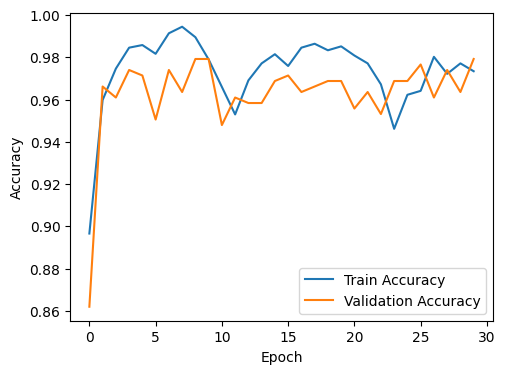

In [35]:
import matplotlib.pyplot as plt

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



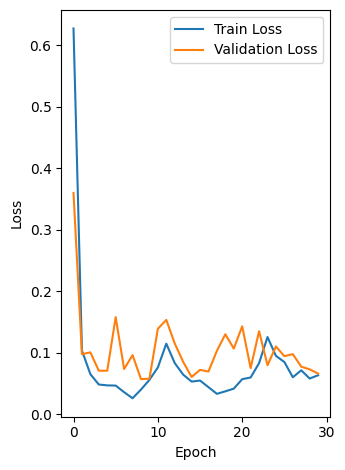

In [36]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()